**************************************************************************
Analysis of data on cases and deaths from COVID-19 in the States of Mexico
**************************************************************************

In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
dfsc = pd.read_csv('C:/Users/angel/covidmx/Data/Casos_Diarios_Estado_Nacional_Confirmados_20210621.csv')

We remove the "nacional" element

In [3]:
dfsc = dfsc.query("nombre != 'Nacional'").copy()
dfsc.head().loc[:, ['nombre', 'poblacion']]

,nombre,poblacion
0,AGUASCALIENTES,1434635
1,BAJA CALIFORNIA,3634868
2,BAJA CALIFORNIA SUR,804708
3,CAMPECHE,1000617
4,CHIAPAS,5730367


************************************
The 10 most populous states in Mexico are
************************************

In [4]:
maxpop=dfsc.nlargest((10), 'poblacion')
maxpop.loc[:, ['nombre', 'poblacion']]

,nombre,poblacion
14,MEXICO,17427790
6,DISTRITO FEDERAL,9018645
29,VERACRUZ,8539862
13,JALISCO,8409693
20,PUEBLA,6604451
10,GUANAJUATO,6228175
4,CHIAPAS,5730367
18,NUEVO LEON,5610153
15,MICHOACAN,4825401
19,OAXACA,4143593


************************************
confirmed cases by states
************************************

In [5]:
dfsc

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,12-06-2021,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,20-06-2021,21-06-2021
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,0,1,10,10,3,5,1,1,0,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,9,15,64,48,54,38,19,6,6,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,146,127,367,289,297,274,185,106,64,2
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,25,26,79,56,77,60,42,18,5,0
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,20,19,50,33,29,35,29,16,3,0
5,8,3801487,CHIHUAHUA,0,0,0,0,0,0,0,...,8,15,47,44,21,16,7,0,0,0
6,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,422,137,889,858,838,837,779,386,115,0
7,5,3218720,COAHUILA,0,0,0,0,0,0,0,...,7,5,28,31,26,25,23,8,5,0
8,6,785153,COLIMA,0,0,0,0,0,0,0,...,13,3,7,10,18,18,5,3,2,0
9,10,1868996,DURANGO,0,0,0,0,0,0,0,...,8,3,24,17,21,17,11,1,0,0


In [6]:
dfsc.shape

(32, 542)

**********************************************************************************************
The number of cases of covid-19 by states reported in Mexico since the pandemic until now are
**********************************************************************************************

In [7]:
dfsc['total'] = dfsc.iloc[:, -539:-1].sum(axis=1)
dfsc.sort_values('total',inplace=True, ascending = False)
dfsc.loc[:, ['nombre', 'total']]

,nombre,total
6,DISTRITO FEDERAL,673666
14,MEXICO,256711
10,GUANAJUATO,132654
18,NUEVO LEON,126087
13,JALISCO,88151
20,PUEBLA,85952
25,SONORA,77872
26,TABASCO,73707
21,QUERETARO,69570
7,COAHUILA,69397


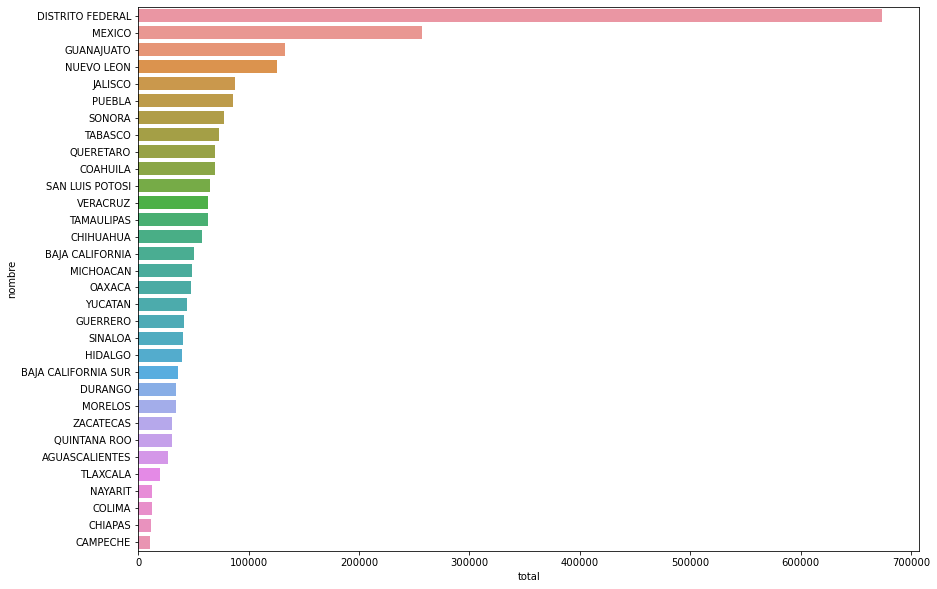

In [8]:
plt.figure(figsize=(14,10))
sns.barplot(x="total", y="nombre", data=dfsc)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The 10 states with the highest number of reported cases with covid -19 in Mexico since the beginning of the pandemic until now are
**********************************************************************************************

In [9]:
mcdfsc=dfsc.nlargest((10), 'total')
mcdfsc.loc[:, ['nombre', 'total']]

,nombre,total
6,DISTRITO FEDERAL,673666
14,MEXICO,256711
10,GUANAJUATO,132654
18,NUEVO LEON,126087
13,JALISCO,88151
20,PUEBLA,85952
25,SONORA,77872
26,TABASCO,73707
21,QUERETARO,69570
7,COAHUILA,69397


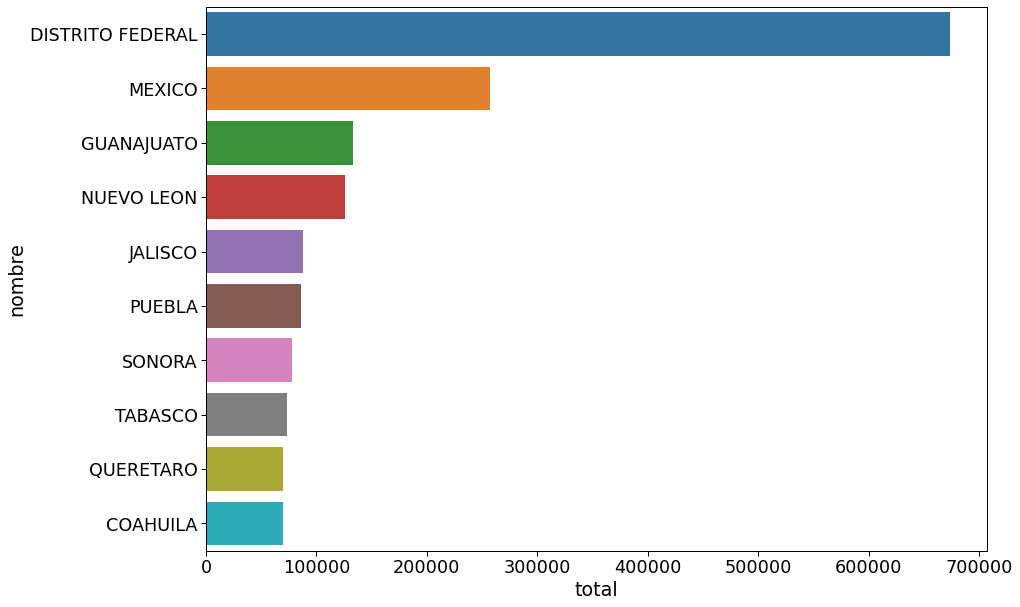

In [10]:
plt.figure(figsize=(14,10))
sns.barplot(x="total", y="nombre", data=mcdfsc)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The ratio of cases of covid-19 by states reported in Mexico since the beginning of the pandemic until now are
**********************************************************************************************

In [11]:
dfsc['rate'] = (dfsc['total']/dfsc['poblacion'])*100000
dfsc.sort_values('rate',inplace=True, ascending = False)
dfsc.head().loc[:, ['nombre', 'total', 'rate']]

,nombre,total,rate
6,DISTRITO FEDERAL,673666,7469.703043
2,BAJA CALIFORNIA SUR,36317,4513.065609
21,QUERETARO,69570,3051.801668
26,TABASCO,73707,2865.426758
25,SONORA,77872,2532.632787


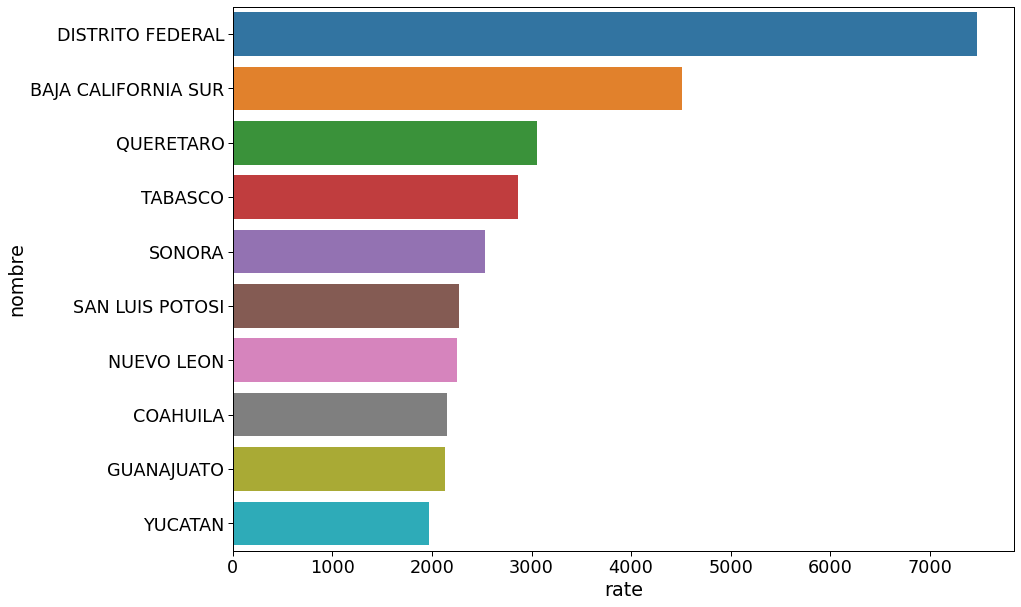

In [12]:
maxratesc=dfsc.nlargest((10), 'rate')
plt.figure(figsize=(14,10))
sns.barplot(x="rate", y="nombre", data=maxratesc)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The ratio of cases of covid-19 by states reported during the 2020 in Mexico are
**********************************************************************************************

In [13]:
dfsc['total2020'] = dfsc.iloc[:, -523:158].sum(axis=1)
dfsc['rate2020'] = (dfsc['total2020']/dfsc['poblacion'])*100000
dfsc.sort_values('rate2020',inplace=True, ascending = False)
dfsc.head().loc[:, ['nombre', 'total', 'rate', 'total2020', 'rate2020']]

,nombre,total,rate,total2020,rate2020
6,DISTRITO FEDERAL,673666,7469.703043,35071,388.872164
26,TABASCO,73707,2865.426758,5146,200.055437
1,BAJA CALIFORNIA,50286,1383.434006,6768,186.196583
24,SINALOA,41039,1300.070897,4865,154.117910
25,SONORA,77872,2532.632787,4603,149.703471


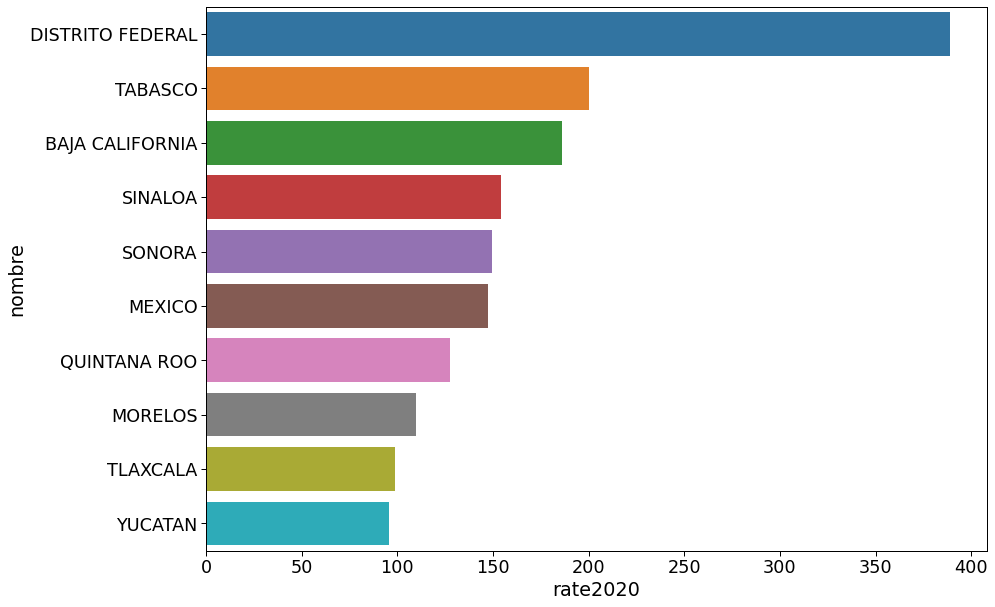

In [14]:
maxrate60sc=dfsc.nlargest((10), 'rate2020')
plt.figure(figsize=(14,10))
sns.barplot(x="rate2020", y="nombre", data=maxrate60sc)
sns.set_context('paper', font_scale=2)

dfsc[['nombre', 'total']]

The 10 top of positive cases of COVID-19 by states in Mexico are...

mcdfsc[['nombre','total']]

dfsc.head()

maxratesc.loc[:, ['nombre', 'total', 'rates']]

maxrate60sc.loc[:, ['nombre', 'total60', 'rates60']]

********************************
deaths by states
********************************

In [15]:
dfsd = pd.read_csv('C:/Users/angel/covidmx/Data/Casos_Diarios_Estado_Nacional_Defunciones_20210621.csv')

We remove the "nacional" element

In [16]:
dfsd = dfsd.query("nombre != 'Nacional'").copy()
dfsd.shape

(32, 521)

************************************
covid deaths by states
************************************

In [17]:
dfsd['total'] = dfsd.iloc[:, -518:-1].sum(axis=1)
dfsd.sort_values('total',inplace=True, ascending = False)
dfsd.loc[:, ['nombre', 'total']]

,nombre,total
14,MEXICO,37211
6,DISTRITO FEDERAL,34461
13,JALISCO,12605
20,PUEBLA,12173
10,GUANAJUATO,11079
29,VERACRUZ,10063
18,NUEVO LEON,9692
1,BAJA CALIFORNIA,8648
5,CHIHUAHUA,7493
25,SONORA,6739


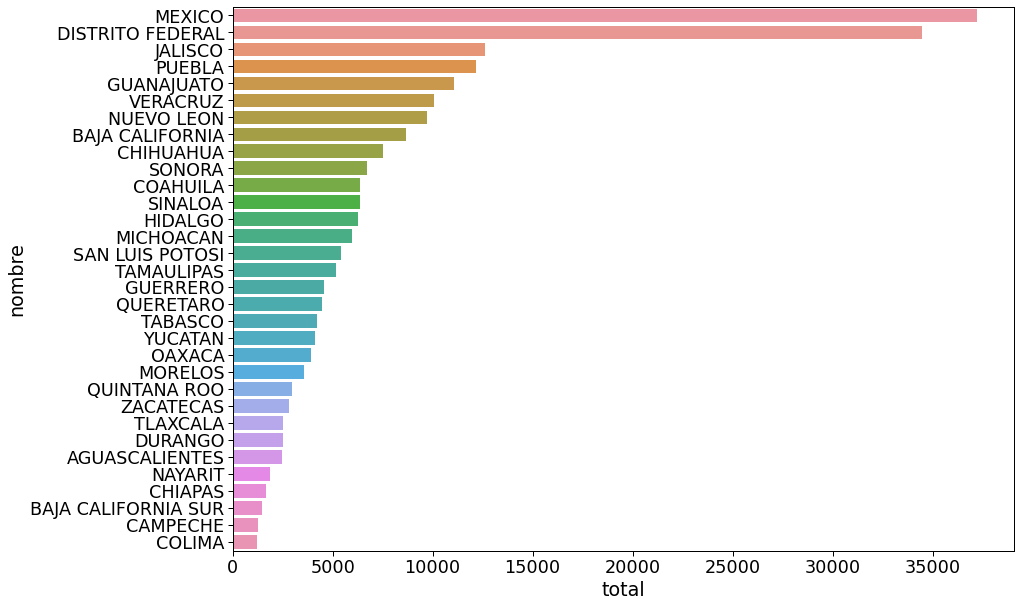

In [18]:
plt.figure(figsize=(14,10))
sns.barplot(x="total", y="nombre", data=dfsd)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The 10 states with the highest number of death by covid -19 in Mexico since the beginning of the pandemic until now are
**********************************************************************************************

In [19]:
mddfsd=dfsd.nlargest((10), 'total')
mddfsd
#mddfsd[['nombre','total']]

,cve_ent,poblacion,nombre,20-01-2020,21-01-2020,22-01-2020,23-01-2020,24-01-2020,25-01-2020,26-01-2020,...,12-06-2021,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,20-06-2021,total
14,15,17427790,MEXICO,0,0,0,0,0,0,0,...,4,3,3,6,4,4,3,4,1,37211
6,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,5,3,8,5,6,9,3,2,0,34461
13,14,8409693,JALISCO,0,0,0,0,0,0,0,...,2,3,0,3,1,1,2,0,2,12605
20,21,6604451,PUEBLA,0,0,0,0,0,0,0,...,5,8,4,7,4,4,3,0,0,12173
10,11,6228175,GUANAJUATO,0,1,0,0,0,0,0,...,1,0,0,2,0,1,1,0,0,11079
29,30,8539862,VERACRUZ,0,0,0,0,0,0,0,...,1,1,1,2,5,1,0,0,0,10063
18,19,5610153,NUEVO LEON,0,0,0,0,0,0,0,...,2,2,2,2,4,2,0,0,0,9692
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,1,3,0,1,4,6,2,0,1,8648
5,8,3801487,CHIHUAHUA,0,0,0,0,0,0,0,...,2,1,4,3,2,0,1,0,0,7493
25,26,3074745,SONORA,0,0,0,0,0,0,0,...,1,2,4,7,2,1,2,0,0,6739


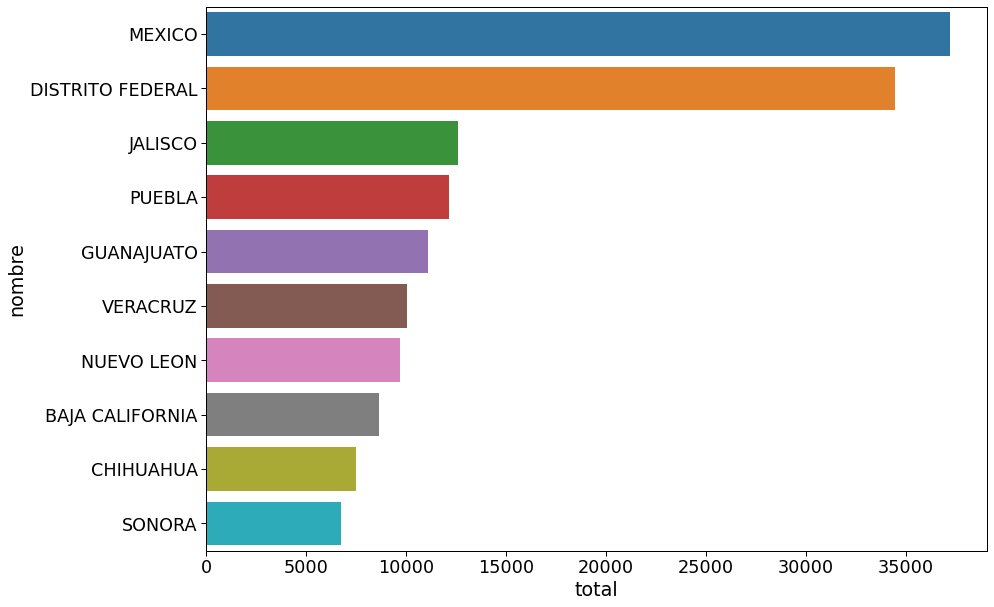

In [20]:
plt.figure(figsize=(14,10))
sns.barplot(x="total", y="nombre", data=mddfsd)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The ratio of death by covid-19 in Mexico since the beginning of the pandemic until now are
**********************************************************************************************

In [21]:
dfsd['rate'] = (dfsd['total']/dfsd['poblacion'])*100000
dfsd.sort_values('rate',inplace=True, ascending = False)
dfsd.head().loc[:, ['nombre', 'total', 'rate']]

,nombre,total,rate
6,DISTRITO FEDERAL,34461,382.108399
1,BAJA CALIFORNIA,8648,237.917856
25,SONORA,6739,219.172647
14,MEXICO,37211,213.515311
12,HIDALGO,6268,203.083579


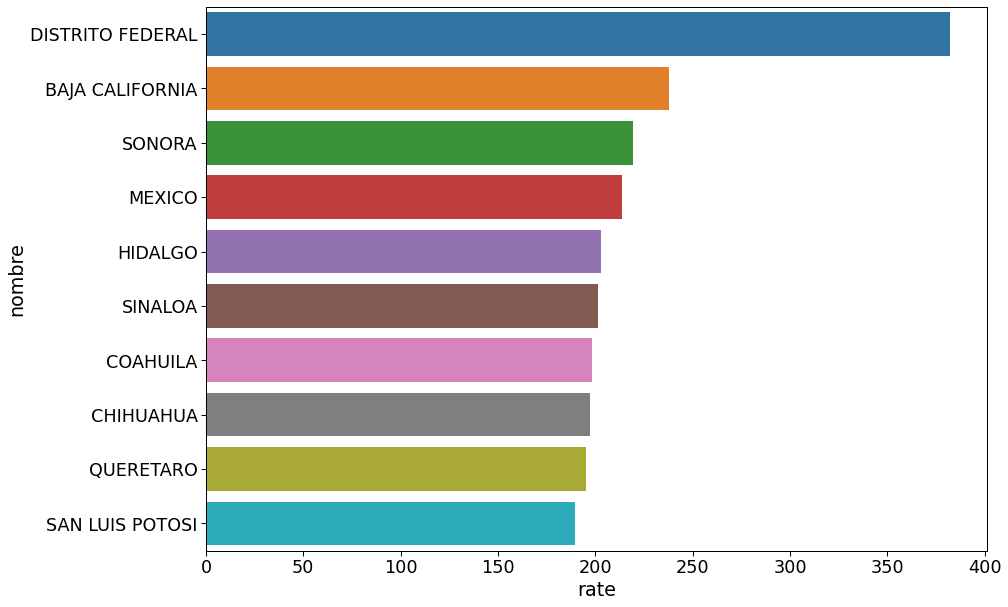

In [22]:
maxratesd=dfsd.nlargest((10), 'rate')
plt.figure(figsize=(14,10))
sns.barplot(x="rate", y="nombre", data=maxratesd)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The ratio of deaths by covid-19 by states reported during the last 60 days in Mexico are
**********************************************************************************************

In [23]:
dfsd['total2020'] = dfsd.iloc[:, -518:-158].sum(axis=1)
dfsd['rate2020'] = (dfsd['total2020']/dfsd['poblacion'])*100000
dfsd.sort_values('rate2020',inplace=True, ascending = False)
dfsd.head().loc[:, ['nombre', 'total', 'rate', 'total2020', 'rate2020']]

,nombre,total,rate,total2020,rate2020
6,DISTRITO FEDERAL,34461,382.108399,23613,261.824254
1,BAJA CALIFORNIA,8648,237.917856,7261,199.759661
25,SONORA,6739,219.172647,5590,181.803694
7,COAHUILA,6376,198.091167,5112,158.820898
5,CHIHUAHUA,7493,197.107079,5961,156.807060


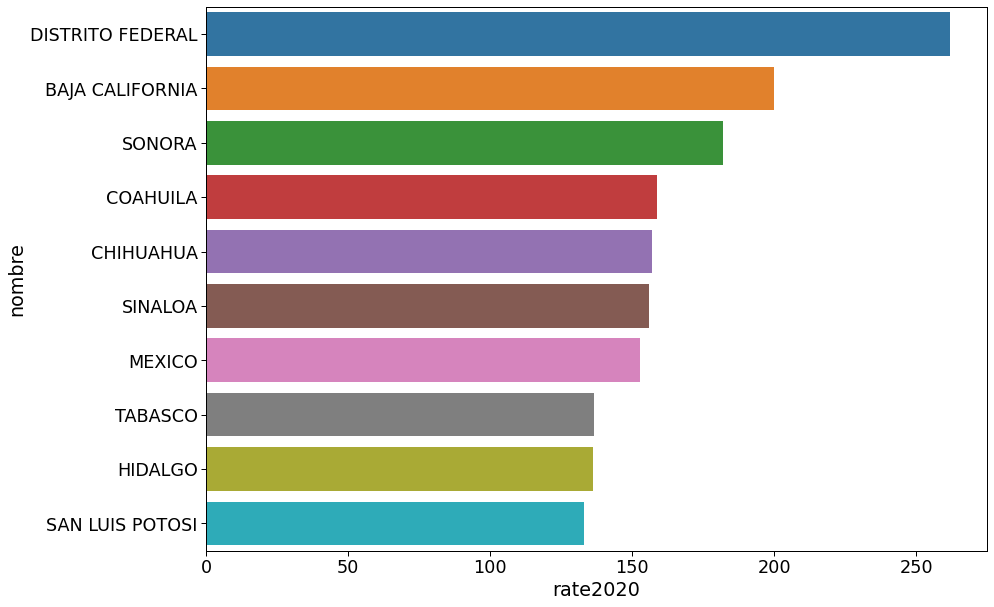

In [24]:
maxrate60sd=dfsd.nlargest((10), 'rate2020')
plt.figure(figsize=(14,10))
sns.barplot(x="rate2020", y="nombre", data=maxrate60sd)
sns.set_context('paper', font_scale=2)

In [25]:
dfsmerge= pd.merge(dfsc, dfsd, on='nombre', how='outer')
#dfsmerge.head().loc[:, ['nombre', 'total_x', 'total_y']]
dfsmerge.head()

,cve_ent_x,poblacion_x,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,15-06-2021_y,16-06-2021_y,17-06-2021_y,18-06-2021_y,19-06-2021_y,20-06-2021_y,total_y,rate_y,total2020_y,rate2020_y
0,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,5,6,9,3,2,0,34461,382.108399,23613,261.824254
1,27,2572287,TABASCO,0,0,0,0,0,0,0,...,2,2,2,1,1,2,4234,164.600606,3511,136.493323
2,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,1,4,6,2,0,1,8648,237.917856,7261,199.759661
3,25,3156674,SINALOA,0,0,0,0,0,0,0,...,2,2,1,0,0,0,6362,201.541242,4925,156.018645
4,26,3074745,SONORA,0,0,0,0,0,0,0,...,7,2,1,2,0,0,6739,219.172647,5590,181.803694


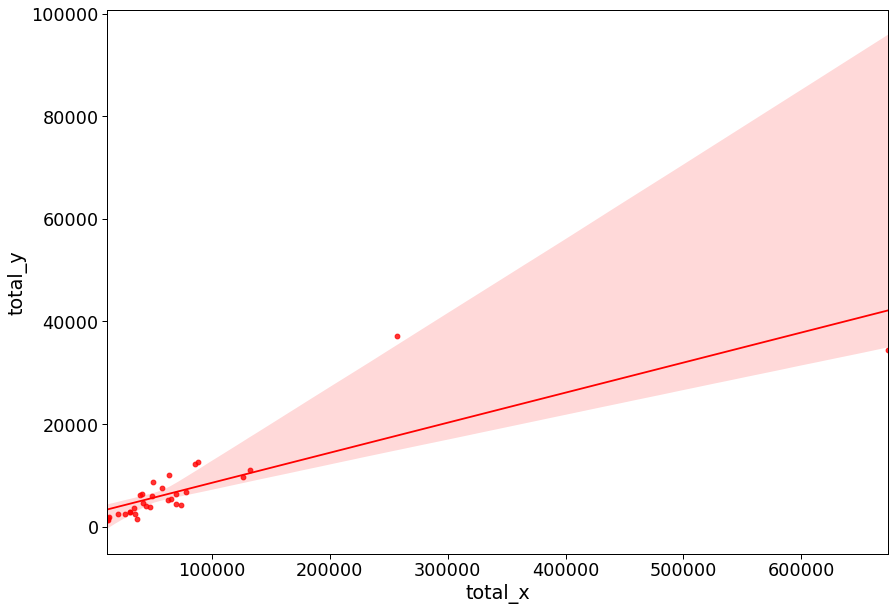

In [26]:
plt.figure(figsize=(14,10))
ax = sns.regplot(x="total_x", y="total_y", data=dfsmerge, color="r")
sns.set_context('paper', font_scale=2)

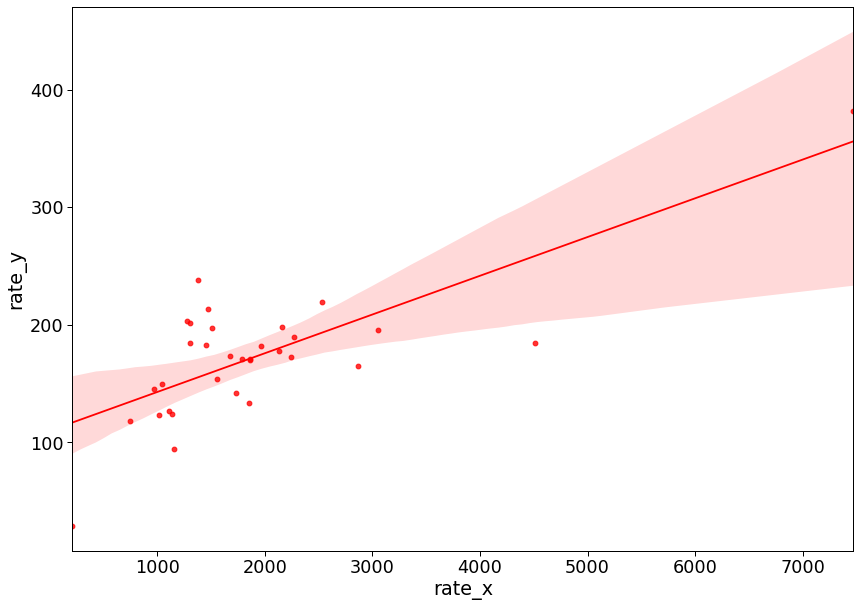

In [27]:
plt.figure(figsize=(14,10))
ax = sns.regplot(x="rate_x", y="rate_y", data=dfsmerge, color="r")
sns.set_context('paper', font_scale=2)

In [28]:
dfsmerge.head()

,cve_ent_x,poblacion_x,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,15-06-2021_y,16-06-2021_y,17-06-2021_y,18-06-2021_y,19-06-2021_y,20-06-2021_y,total_y,rate_y,total2020_y,rate2020_y
0,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,5,6,9,3,2,0,34461,382.108399,23613,261.824254
1,27,2572287,TABASCO,0,0,0,0,0,0,0,...,2,2,2,1,1,2,4234,164.600606,3511,136.493323
2,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,1,4,6,2,0,1,8648,237.917856,7261,199.759661
3,25,3156674,SINALOA,0,0,0,0,0,0,0,...,2,2,1,0,0,0,6362,201.541242,4925,156.018645
4,26,3074745,SONORA,0,0,0,0,0,0,0,...,7,2,1,2,0,0,6739,219.172647,5590,181.803694


In [29]:
dfsFinal =  dfsmerge.loc[:, ['nombre', 'poblacion_x', 'total_x', 'rate_x', 'total2020_x', 'rate2020_x', 'total_y', 'rate_y', 'total2020_y', 'rate2020_y']].copy()
dfsFinal.head()

,nombre,poblacion_x,total_x,rate_x,total2020_x,rate2020_x,total_y,rate_y,total2020_y,rate2020_y
0,DISTRITO FEDERAL,9018645,673666,7469.703043,35071,388.872164,34461,382.108399,23613,261.824254
1,TABASCO,2572287,73707,2865.426758,5146,200.055437,4234,164.600606,3511,136.493323
2,BAJA CALIFORNIA,3634868,50286,1383.434006,6768,186.196583,8648,237.917856,7261,199.759661
3,SINALOA,3156674,41039,1300.070897,4865,154.117910,6362,201.541242,4925,156.018645
4,SONORA,3074745,77872,2532.632787,4603,149.703471,6739,219.172647,5590,181.803694


In [30]:
dfsFinal.rename(columns = {'poblacion_x':'population', 'nombre': 'state', 'total_x': 'total_cases','rate_x': 'cases_rates', 'total2020_x' : 'total_cases_2020', 'rate2020_x':'cases_rate_2020', 'total_y': 'total_deaths','rate_y': 'deaths_rates','total2020_y': 'total_deaths_2020', 'rate2020_y':'deaths_rate_2020'}, inplace=True)
dfsFinal.sort_values(by=['state'], ascending = True, inplace=True)
dfsFinal

,state,population,total_cases,cases_rates,total_cases_2020,cases_rate_2020,total_deaths,deaths_rates,total_deaths_2020,deaths_rate_2020
14,AGUASCALIENTES,1434635,26695,1860.752038,1105,77.023076,2456,171.193370,1718,119.751714
2,BAJA CALIFORNIA,3634868,50286,1383.434006,6768,186.196583,8648,237.917856,7261,199.759661
11,BAJA CALIFORNIA SUR,804708,36317,4513.065609,746,92.704434,1486,184.663257,941,116.936827
13,CAMPECHE,1000617,11099,1109.215614,791,79.051225,1266,126.521936,1063,106.234453
24,CHIAPAS,5730367,12063,210.510077,2522,44.011143,1655,28.881222,1377,24.029875
10,CHIHUAHUA,3801487,57486,1512.197727,3580,94.173675,7493,197.107079,5961,156.807060
20,COAHUILA,3218720,69397,2156.043396,1836,57.041308,6376,198.091167,5112,158.820898
30,COLIMA,785153,12208,1554.856187,202,25.727470,1210,154.110091,873,111.188520
0,DISTRITO FEDERAL,9018645,673666,7469.703043,35071,388.872164,34461,382.108399,23613,261.824254
29,DURANGO,1868996,34588,1850.619263,599,32.049293,2495,133.494133,1928,103.156989


In [31]:
dfsFinal.to_csv('../Data/week1analyzes2020.csv', index=False)